In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import math
import random
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing
import scipy
import scipy.linalg as slin
import scipy.sparse.linalg as sparselin
import scipy.sparse as sparse

sns.set(color_codes=True)

import sys
sys.path.append("C:/Tang/influence-release-master")  #设置自定义包的搜索路径
from load_vehicles_rainy_testset import load_vehicles_rainy_testset
from influence.image_utils import plot_flat_colorimage, plot_flat_colorgrad

Using TensorFlow backend.


In [2]:
num_classes = 2
num_train_ex_per_class = 1000
num_test_ex_per_class = 300

model_name = 'carair_%s_%s' % (num_train_ex_per_class, num_test_ex_per_class)
image_data_sets = load_vehicles_rainy_testset(
    num_train_ex_per_class=num_train_ex_per_class, 
    num_test_ex_per_class=num_test_ex_per_class)

X_train = image_data_sets.train.x
X_test = image_data_sets.test.x
Y_train = image_data_sets.train.labels * 2 - 1
Y_test = image_data_sets.test.labels * 2 - 1

Loading vehicles from disk...


The test index now is 38. 
Test image:
-1.0 1.3589005 0.9993463158607483
Top from Inception:
1072 -1.0 331.8644 1.8559066578745843e-05
1995 -1.0 313.53482 2.0208630710840224e-05
871 -1.0 314.8647 2.188558131456375e-05
887 -1.0 379.07117 2.7074458077549934e-05
39 -1.0 339.72144 3.3933326601982115e-05


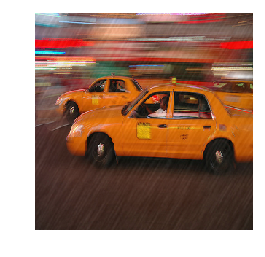

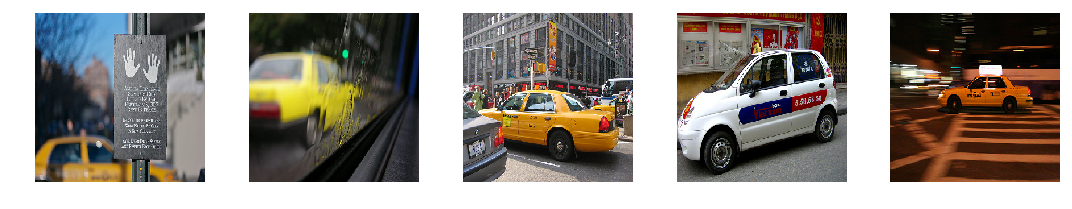

The test index now is 533. 
Test image:
1.0 0.628897 0.9999477863311768
Top from Inception:
567 1.0 257.27826 1.4350455021485686e-06
1992 1.0 339.41382 1.6074901213869453e-06
1654 1.0 312.68607 1.7800878267735243e-06
1853 1.0 248.79483 2.3934973869472743e-06
1444 1.0 362.65787 5.403984338045121e-06


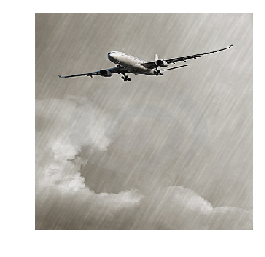

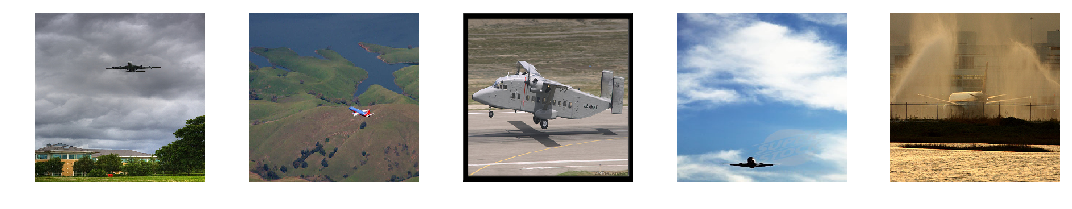

In [7]:
for i in [38, 533]:
    f = np.load('output16/adver_testset_carair_results_%s.npz' % i)
    test_idx = f['test_idx']
    inception_Y_pred_correct = f['inception_Y_pred_correct']
    
    #if inception_Y_pred_correct[test_idx] < 0.5:
    #count += 1
    distances = f['distances']
    flipped_idx = f['flipped_idx']
    rbf_margins_test = f['rbf_margins_test']
    rbf_margins_train = f['rbf_margins_train']        
    rbf_predicted_loss_diffs = f['rbf_predicted_loss_diffs']
    inception_predicted_loss_diffs = f['inception_predicted_loss_diffs']

    print('The test index now is %s. ' % i)
    sns.set_style('white')
    fontsize=14

    print('Test image:')
    print(Y_test[test_idx], rbf_margins_test[test_idx], inception_Y_pred_correct[test_idx])
    #plot_flat_colorimage((X_test[test_idx, :] + 1) / 2, 0, side=299)
    plt.axis('off')
    plt.imshow((np.reshape(X_test[test_idx, :], [299, 299, 3]) + 1) / 2, interpolation='none', )
    #plt.savefig('finish/rainy_%s.jpg' % i, dpi=300, bbox_inches='tight')

    print('Top from Inception:')
    fig, axs = plt.subplots(1, 5, figsize=(15,3))
    for counter, train_idx in enumerate(np.argsort(inception_predicted_loss_diffs)[-5:]):
        print(train_idx, Y_train[train_idx], distances[train_idx], inception_predicted_loss_diffs[train_idx])    
        x_train = X_train[train_idx, :]
        axs[counter].imshow((np.reshape(x_train, [299, 299, 3]) + 1) / 2, interpolation='none')  
        axs[counter].axis('off')
    plt.tight_layout()
    #plt.savefig('finish/rainy_%s_top_inception.jpg' % i, dpi=300, bbox_inches='tight')
    plt.show()